In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi =  "indata/3pipes3.inp"        #name of .inp file
fcr = "indata/bcs3pipesr.config"  #name of .config file
fc0 = "indata/bcs3pipes0.config"  
mtype = 1                        #model used along network edges. 1 for Preissman Slot. 0 for uniform
n0 = PyNetwork(fi, fc0, mtype)   #a network with Q==0 at boundaries
nr = PyNetwork(fi, fcr,mtype)    #a network with reflecting BCs
print n0 



Network at address 0x108126500 with 4 nodes and 3 edges



In [3]:
#n1.showCurrentData()    
dt = n0.T/n0.M
V00 = n0.getTotalVolume()
n0.runForwardProblem(dt)  #solve up to time T
V0r = nr.getTotalVolume()
nr.runForwardProblem(dt)


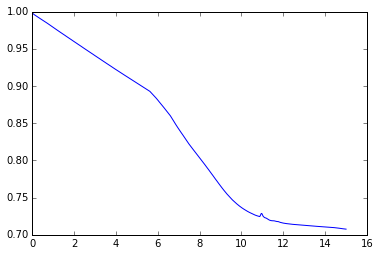

In [4]:
Ke = np.array([nr.getKE(i) for i in range(n0.M)])
Pe = np.array([nr.getPE(i) for i in range (n0.M)])
t= linspace(0,n0.T,n0.M)
#plot(t,Ke,t,Pe)
E0 = Ke[0]+Pe[0]
plot(t,(Ke+Pe)/E0)

In [5]:
print "Elapsed time is %.5f s, solve time is %.5f s" %(n0.T,n0.solve_time)
print "Initial Volume is %f"%V00

dV0 = V00-n0.getTotalVolume()
dVr = V0r-nr.getTotalVolume()
print "         Q =0             reflecting       "
print "V0       %3.5f        %3.5f" %(V00,V0r)
print "Vf       %3.5f        %3.5f" %(n0.getTotalVolume(), nr.getTotalVolume())
print "dV       %3.5f          %3.5f" % (dV0,dVr)
print "dV/V0    %e     %e"%(dV0/V00, dVr/V0r)

Elapsed time is 15.00000 s, solve time is 3.67827 s
Initial Volume is 168.393590
         Q =0             reflecting       
V0       168.39359        168.39359
Vf       167.87537        168.39359
dV       0.51822          -0.00000
dV/V0    3.077442e-03     -4.438614e-12


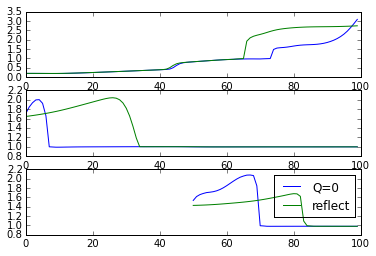

0.769218180636
[120.33334862668688, 120.11976278875906, 120.18812090513553]
cmax*dt/dx = 0.727736 
3.08355129898
1.70813651388
1.53238264733
max(H(x,T))
     Q = 0       reflecting
pipe 0  3.083551    2.743045
pipe 1  2.002225    2.042987
pipe 2  2.075336    1.677040
space-average grad(H)
        Q = 0       reflecting
max  265.566994   117.426281
mean 3.836019   2.976733


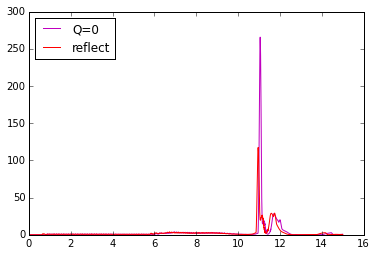

In [6]:
qi = [n0.q(i) for i in range(n0.Nedges)]
hi = [n0.getHofA(i) for i in range(3)]
hir = [nr.getHofA(i) for i in range(3)]
Ai = [qi[i][0:n0.Ns[i]] for i in range(3)]
Qi = [qi[i][n0.Ns[i]:] for i in range(3)] 
u= []
ymaxs = [ceil(max(h)) for h in hi]
for i in range(3):
        u.append([Qi[i][k]/Ai[i][k] for k in range(n0.Ns[i])])

fig,ax = plt.subplots(nrows = n0.Nedges)
x0 = [0,0,100.-n0.Ns[2]]
for k in range(n0.Nedges):
    x = np.arange(0,n0.Ls[k], n0.Ls[k]/n0.Ns[k])+x0[k]*np.ones(size(hi[k]))
    ax[k].plot(x,hi[k],'b')
    ax[k].plot(x,hir[k],'g')
    #ax[k].set_ylim([0,ymaxs[i]])
    ax[k].set_xlim([0,100])
    #ax[k].set_yticks(np.linspace(0,ymaxs[i],6))
legend(['Q=0', 'reflect'])
savefig("../../solultion_r66.pdf", format='pdf')
plt.show()

print n0.getAveGradH(600)
umax = max(abs(max(ui)) for ui in u)
print n0.cmax
print "cmax*dt/dx = %f "%((max(n0.a)+umax)*dt/n0.Ls[0]*n0.Ns[0])
print hi[0][99]
print hi[1][0]
print hi[2][0]

print "max(H(x,T))"
print "     Q = 0       reflecting"
for i in range(3):
    print "pipe %d  %f    %f" %(i, max(hi[i]), max(hir[i]))
Hbar = [n0.getAveGradH(i) for i in range(n0.M+1)]
Hbarr = [nr.getAveGradH(i) for i in range(nr.M+1)]
t = np.linspace(0,n0.T,n0.M+1)
plot(t,Hbar,'m')
plot(t,Hbarr,'r')
legend(['Q=0', 'reflect'], loc ='upper left')
savefig("../../gradH_r66.pdf", format='pdf')
print "space-average grad(H)"
print "        Q = 0       reflecting"
print "max  %f   %f" %(max(Hbar),max(Hbarr))
print "mean %f   %f" %(mean(Hbar), mean(Hbarr))



In [ ]:
def it(i,n,N):
    return (N+2)*n+i;

In [ ]:
fig,ax = plt.subplots(nrows = n0.Nedges)
x0 = [0,0,100.-n0.Ns[-1]]
t = np.linspace(0,n0.T,n0.M+2)
for k in range(n0.Nedges):
    phist = n0.phist(k)
    p = phist.reshape(n0.M+2,n0.Ns[k]+2)
    #p = phist.reshape(n0.Ns[k]+2,n0.M+2)
    s = shape(p)
    p2 = p.astype(int)
    x = np.linspace(0,n0.Ls[k], n0.Ns[k]+2)
    X,T = np.meshgrid(x,t)
    cf = ax[k].imshow(p2, aspect='auto',origin='lower')
    cf.set_cmap(plt.cm.bone)
#cb = colorbar(cf, ticks = [0,1], orientation = 'horizontal')
#cb.ax.set_xticklabels(['False', 'True'])
    #ax[k].set_ylim([0,ymaxs[i]])
    #ax[k].set_xlim([0,100])
print shape(p)


In [ ]:
fig,ax = plt.subplots(nrows = n0.Nedges)
x0 = [0,0,100.-n0.Ns[-1]]
t = np.linspace(0,n0.T,n0.M+2)
for k in range(n0.Nedges):
    phist = nr.phist(k)
    p = phist.reshape(n0.M+2,n0.Ns[k]+2)
    s = shape(p)
    p2 = p.astype(int)
    x = np.linspace(0,n0.Ls[k], n0.Ns[k]+2)
    X,T = np.meshgrid(x,t)
    cf = ax[k].imshow(p2, aspect='auto',origin='lower')
    cf.set_cmap(plt.cm.bone)
#cb = colorbar(cf, ticks = [0,1], orientation = 'horizontal')
#cb.ax.set_xticklabels(['False', 'True'])
    #ax[k].set_ylim([0,ymaxs[i]])
    #ax[k].set_xlim([0,100])
print shape(p)

In [1]:
print hi[0][-1]
print hi[1][0]
print hi[2][0]
print n0.a

NameError: name 'hi' is not defined

In [ ]:
xgood = [-0.6746336425052268, 0.3929209271302193, 0.1973050791881181, -0.05013525191675948, 0.23496014533696993, 0.05708314708689007, 0.3522406842364152, -0.09905964763856627, 0.0734732917634615, -0.5896266740705881, -0.0792411751293785, -0.07888391087489807, -0.3046798334842904, 0.520074906919188, -0.2943897531723091, -0.14160338303198525, -8.623427645223251e-06, -3.6521105914176848e-06, -1.2484771645342056e-05, 9.792962812864235e-06, 1.0745510279929457e-05, 1.2520849540545679e-05, -4.544559347600004e-06, -1.155025325385363e-06, 9.041571992302412e-06, -2.1574126074518583e-05, -6.199034669364961e-06, 4.843472497262422e-06, -2.7997384888334016e-06, -1.0799020768271911e-05, -3.523753990486484e-06, 5.9742214963075885e-06]

In [ ]:
ndof = 32

wn = np.array([2])
x0 = 0*np.ones(ndof*len(wn))
for i in range(ndof*len(wn)/2):
    x0[2*i+1] = 0
#for i in range(len(x0)):
#    x0[i] = xgood[i]
opt1 = PyBC_opt_dh(fi, fc0, ndof, x0, 1, wn)


opt1.compute_f()

f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype


In [ ]:
opt1.solve()

In [ ]:
print opt1.f
print opt1.x
ndof2 = 32
x02 = np.zeros(ndof2*len(wn));
opt2 = PyBC_opt_dh(fi, fc0, ndof2, x02, 0, wn)
f02 = opt2.f
opt2.compute_f()
print "f is %f" %opt2.f
print "T is %f" %opt2.T
print "Using %s modes" %opt2.modetype



In [ ]:

opt2.solve()
#opt1.x
#opt1.r


In [ ]:
#import matplotlib.pyplot as plt

ff = opt1.f
ff2 = opt2.f
Q1 = opt1.getBCtimeseries(0)
#Q2 = opt1.getBCtimeseries(1)
Q12 = opt2.getBCtimeseries(0)
#Q22  = opt2.getBCtimeseries(1)
t = np.linspace(0,opt1.T, opt1.M+1)
fig,ax = plt.subplots(nrows = 1)


ax.plot(t,Q1,'b')#,t,np.zeros(opt1.M+1),'r')
#ax.plot(t,Q12,'g')
ax.set_ylabel('Q1(t)')

#ax[0].plot(t,Q1,'b')#,t,np.zeros(opt1.M+1),'r')
#ax[0].plot(t,Q12,'g')
#ax[0].set_ylabel('Q1(t)')
#ax[1].plot(t,Q2,'b')#,t,np.zeros(opt1.M+1),'r')
#ax[1].plot(t,Q22, 'g')
legend([opt1.modetype, opt2.modetype],'unoptimized')
#ax[1].set_xlabel('t')
#ax[1].set_ylabel('Q2(t)')
#savefig("../../optcythondemo.pdf", format='pdf')
#print max(abs(Q2[i]) for i in range(len(Q2)))
print opt1.x
print opt2.x
print "max discrepancy is %e"%max([Q1[i]-Q12[i] for i in range(len(Q1))])



In [ ]:
print "                 %s         %s"    %(opt1.modetype, opt2.modetype)
print "CPU time (s)     %4.2f     %4.2f" % (opt1.solve_t, opt2.solve_t)
print "actual time (s)  %4.2f      %4.2f" % (opt1.wsolve_t,opt2.wsolve_t)
print "parallel speedup %1.1f         %1.1f "%(opt1.solve_t/opt1.wsolve_t, opt2.solve_t/opt2.wsolve_t)
print "f0               %4.2f      %4.2f"%(f0,f0)
print "ff               %4.2f       %4.2f" %(ff,ff2)
print "f0/ff  =         %.5f     %.5f"%(ff/f0, ff2/f0)
#print opt1.x

In [ ]:
for i in range(len(x02)):
    x02[i] = opt1.x[i]
print n0.Ls


In [1]:
opt3 = PyBC_opt_dh(fi, fc0, ndof2, x02, 1, wn)
opt3.compute_f()
print opt3.f

In [58]:
print opt1.x

[-2.1391036499142744e-05, 1.648382344257513e-05, 1.5194130096376555e-05, -3.112453293168686e-06, 3.6663063969128227e-06, 1.5595569649360952e-05, -2.8531609746604885e-06, 4.323900017152339e-06, -2.933914848502068e-06, -2.5953855193414282e-06, -8.825790777987424e-07, 3.192591312220249e-06, -7.797284569099623e-06, 1.3864070077098793e-05, -8.454811140941908e-06, -1.6192167267603107e-06, -7.486915208719089e-06, -2.834786873892471e-06, -2.737500125928461e-05, 1.2222210190481686e-05, 1.445083039525268e-05, -1.8791764113707123e-05, -1.3953853674668765e-05, -2.4005228855731144e-06, 3.426189636393526e-06, 1.005327234569448e-05, -8.360758391124902e-06, -6.287671138515951e-06, -4.601561716178503e-06, -6.262144988132824e-07, 6.7671104141421294e-06, 3.6887823155085387e-06]


In [59]:
print opt2.x

[0.00047186008942658105, 0.009976883794371963, 0.0008585388332828412, 0.0016967457284392553, 0.03729382733395991, -0.038086684103361364, -0.00011472150548260665, 0.0012747667187105872, 0.010408445021695419, -0.003898117539133023, 0.003673592360069058, -0.017730138602238533, -0.07635612019783604, 0.0009741254041361439, 0.03706282737356269, 0.16242808289098676, 0.001804530652070897, 0.01614181305066116, -0.007453568282335674, 0.10732665559448563, 0.0002879405034638517, 0.010765066807523243, 0.0002728890692430234, 0.0026684459595989482, -0.003081956623248071, -0.7004126838740525, 0.41824598873888486, 0.03561260596278148, 1.3307396518918588, -0.5466717738288066, 0.26158894620473566, -0.26185444020598103]


In [60]:
opt1.dump()

In [61]:
opt2.dump()